### How are in-demand skills trending for Data Analysts?

### Methology
1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

### Import Libraries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt


# Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Group the Skills by Month
Select only those job postings that are for Data Analysts and the job country is the India. Then extract the month from each job's posting date to see when jobs are listed. Next, converts a column that lists skills into a usable list format. Finally, it rearranges the data so that each skill from the list gets its own row.

In [2]:
df_DA_IND = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

df_DA_IND['job_posted_month_no'] = df_DA_IND['job_posted_date'].dt.month

# Explode job_skills column
df_DA_IND_explode = df_DA_IND.explode('job_skills')

### Pivot in Prep for Plotting
Create a pivot table from the df_DA_IND_explode, setting 'month' as the index, job_skills as the columns, and fills missing entries with zero.

In [8]:
df_DA_IND_pivot = df_DA_IND_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_IND_pivot.loc['Total'] = df_DA_IND_pivot.sum()

df_DA_IND_pivot

job_skills,airflow,alteryx,angular,ansible,arch,asana,asp.net,assembly,atlassian,aurora,...,vue.js,watson,webex,windows,wire,word,workfront,wrike,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,3,21,1,0,0,0,1,0,0,0,...,0,0,1,4,1,37,0,0,0,3
2,7,17,1,0,2,0,0,1,0,1,...,0,1,1,5,0,24,0,0,0,0
3,6,16,2,1,0,0,0,1,1,0,...,0,0,0,5,0,27,0,0,0,2
4,8,8,1,0,4,0,1,2,0,0,...,0,0,1,4,0,27,0,0,0,1
5,5,13,0,0,1,0,0,0,0,0,...,0,0,0,5,0,13,0,0,0,0
6,5,22,1,0,0,0,1,0,0,1,...,0,0,0,1,0,12,1,0,0,1
7,10,13,2,0,1,0,0,0,0,1,...,0,4,0,4,0,22,0,0,0,2
8,19,25,2,0,0,0,0,0,2,0,...,0,1,0,4,0,31,0,0,1,1
9,4,14,0,0,0,2,0,0,1,5,...,0,0,0,2,0,28,0,0,1,2


### Sort columns by count and change month numbers to names
It adds a new row labeled Total that sums up counts across all months for each skill. Finally, it reorders the columns based on the total counts, displaying them from highest to lowest, and shows the updated pivot table.

In [11]:
df_DA_IND_pivot = df_DA_IND_pivot[df_DA_IND_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_IND_pivot = df_DA_IND_pivot.drop('Total')

df_DA_IND_pivot

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,ringcentral,graphql,typescript,ubuntu,react.js,workfront,unreal,wrike,vue.js,centos
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,305,216,218,159,98,89,128,46,32,43,...,0,1,0,0,0,0,0,0,0,0
2,209,148,156,116,75,67,82,26,33,25,...,0,0,0,0,0,0,0,0,0,0
3,229,151,138,125,76,58,62,45,38,29,...,0,0,0,0,0,0,0,0,0,0
4,204,143,138,98,83,56,52,40,31,28,...,0,0,0,0,1,0,0,0,0,0
5,155,101,106,71,61,42,30,33,22,19,...,0,0,0,0,0,0,1,0,0,1
6,193,150,115,114,77,76,74,37,32,24,...,0,0,0,0,0,1,0,0,0,0
7,245,161,174,124,93,67,78,39,31,31,...,0,0,0,0,0,0,0,0,0,0
8,317,216,192,152,127,112,98,52,63,40,...,0,0,0,1,0,0,0,0,0,0
9,341,229,228,195,168,100,92,35,41,29,...,0,0,0,0,0,0,0,0,0,0


### Calculate Percentage of Total Jobs
Calculates the total number of entries for each month in df_DA by grouping the data by 'month' and counting the number of occurrences in each group, storing the results in DA_totals. This is needed to compute the percentages

In [ ]:
DA_total = df_DA_IND.groupby('job_posted_month_no').size()

DA_total

job_posted_month_no
1     628
2     433
3     422
4     418
5     278
6     367
7     457
8     618
9     630
10    500
11    722
12    648
dtype: int64

This code calculates the percentage of each skill's occurrence for each month by dividing the first 12 rows of the df_DA_pivot DataFrame, which contains skill counts, by the monthly totals in DA_totals and multiplying by 100. The new DataFrame, df_DA_pivot_percent, shows skill distributions as percentages of total monthly job entries

In [17]:
df_DA_IND_percent = df_DA_IND_pivot.div(DA_total/100, axis=0)

# changes month number to month name
df_DA_IND_percent = df_DA_IND_percent.reset_index()
df_DA_IND_percent['job_posted_month'] = df_DA_IND_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_IND_percent = df_DA_IND_percent.set_index('job_posted_month')
df_DA_IND_percent = df_DA_IND_percent.drop(columns='job_posted_month_no')

df_DA_IND_percent

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,ringcentral,graphql,typescript,ubuntu,react.js,workfront,unreal,wrike,vue.js,centos
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,48.566879,34.394904,34.713376,25.318471,15.605096,14.171975,20.382166,7.324841,5.095541,6.847134,...,0.000000,0.159236,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000
Feb,48.267898,34.180139,36.027714,26.789838,17.321016,15.473441,18.937644,6.004619,7.621247,5.773672,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000
Mar,54.265403,35.781991,32.701422,29.620853,18.009479,13.744076,14.691943,10.663507,9.004739,6.872038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000
Apr,48.803828,34.210526,33.014354,23.444976,19.856459,13.397129,12.440191,9.569378,7.416268,6.698565,...,0.000000,0.000000,0.000000,0.000000,0.239234,0.00000,0.000000,0.000000,0.0,0.000000
May,55.755396,36.330935,38.129496,25.539568,21.942446,15.107914,10.791367,11.870504,7.913669,6.834532,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.359712,0.000000,0.0,0.359712
Jun,52.588556,40.871935,31.335150,31.062670,20.980926,20.708447,20.163488,10.081744,8.719346,6.539510,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.27248,0.000000,0.000000,0.0,0.000000
Jul,53.610503,35.229759,38.074398,27.133479,20.350109,14.660832,17.067834,8.533917,6.783370,6.783370,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000
Aug,51.294498,34.951456,31.067961,24.595469,20.550162,18.122977,15.857605,8.414239,10.194175,6.472492,...,0.000000,0.000000,0.000000,0.161812,0.000000,0.00000,0.000000,0.000000,0.0,0.000000
Sep,54.126984,36.349206,36.190476,30.952381,26.666667,15.873016,14.603175,5.555556,6.507937,4.603175,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000


### Plot Monthly Skill Demand
Creates a line plot for the top five skills of data analysts, shown as percentages of the total job entries per month, using the first 5 columns of the df_DA_pivot_percent DataFrame. Also the legend is moved outside of the plot for readability.

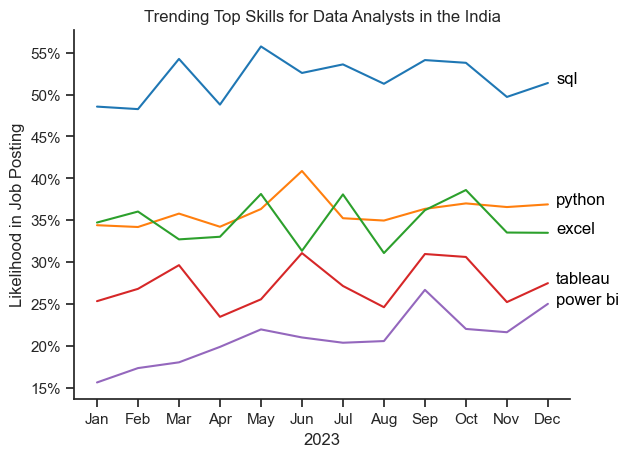

In [25]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_IND_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in the India')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()